In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np
from sklearn.metrics import pairwise_distances


In [5]:
df = pd.read_csv("WineQT.csv")

Shape before dropping: (1143, 13)
Shape after dropping: (1143, 12)


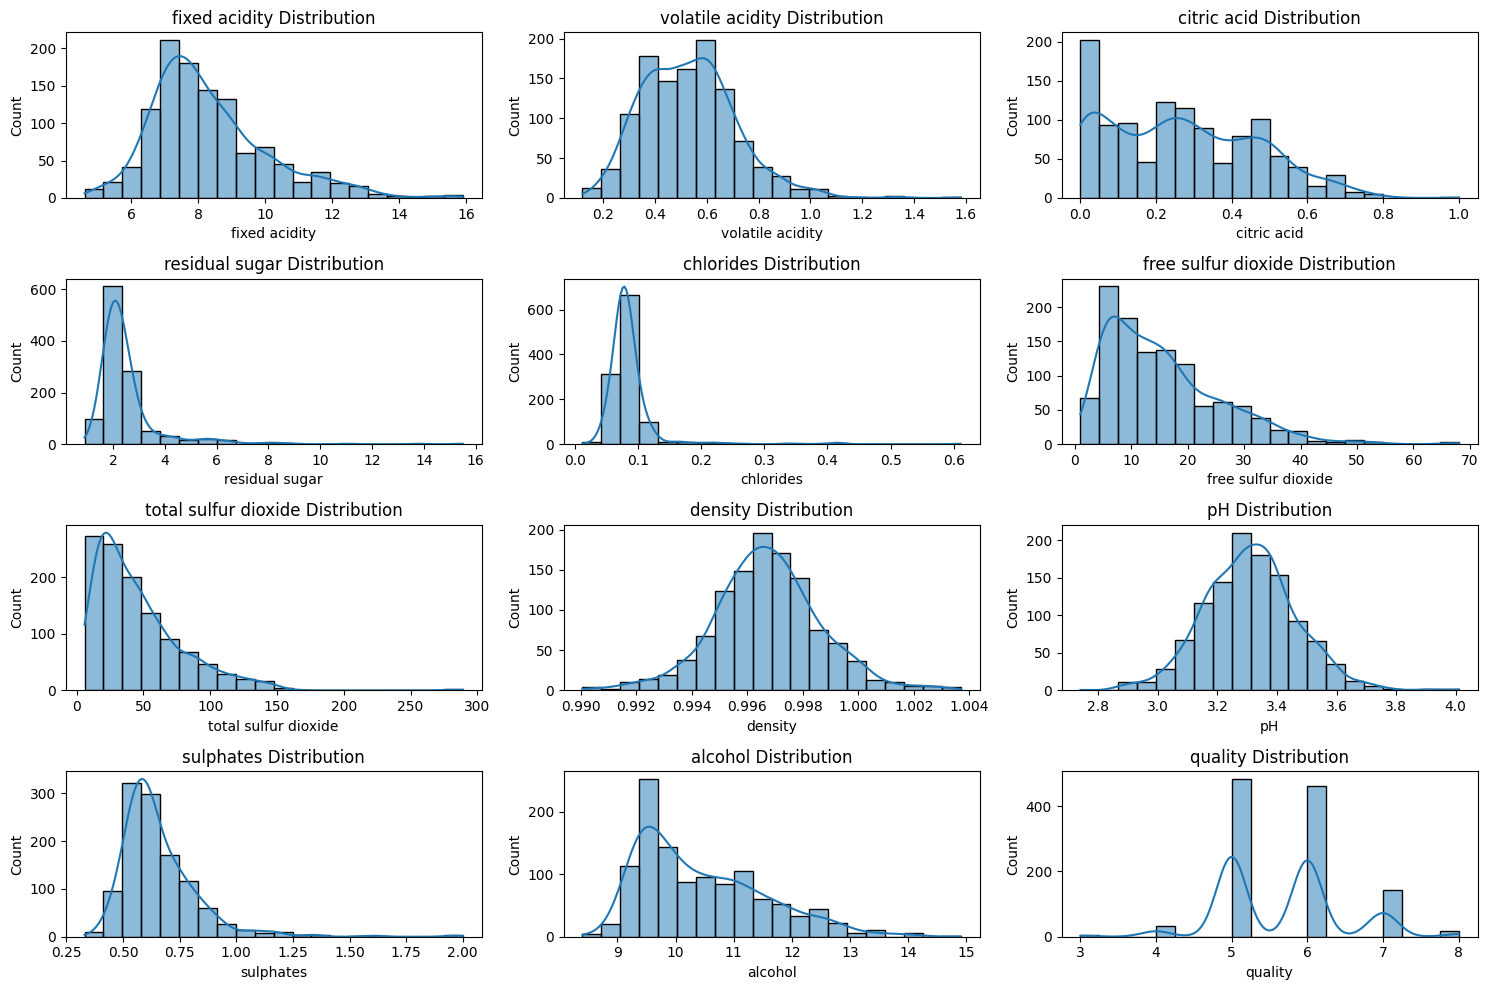

In [7]:
key_point = ["fixed acidity",'volatile acidity','citric acid','residual sugar'
            ,'chlorides','free sulfur dioxide','total sulfur dioxide','density'
            ,'pH','sulphates','alcohol','quality','Id']
df_kp = df[key_point].dropna()
df_kp = df[key_point].drop(columns=['Id'])

print("Shape before dropping:", df.shape)
print("Shape after dropping:", df_kp.shape)
X = df[key_point]

# List of columns to plot
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
           'pH', 'sulphates', 'alcohol', 'quality']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through each column to create a subplot
for i, column in enumerate(columns, 1):
    plt.subplot(4, 3, i)  # 4 rows, 3 columns for 12 subplots
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'{column} Distribution')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Shape before removing outliers: (1143, 13)
Shape after removing outliers: (834, 13)


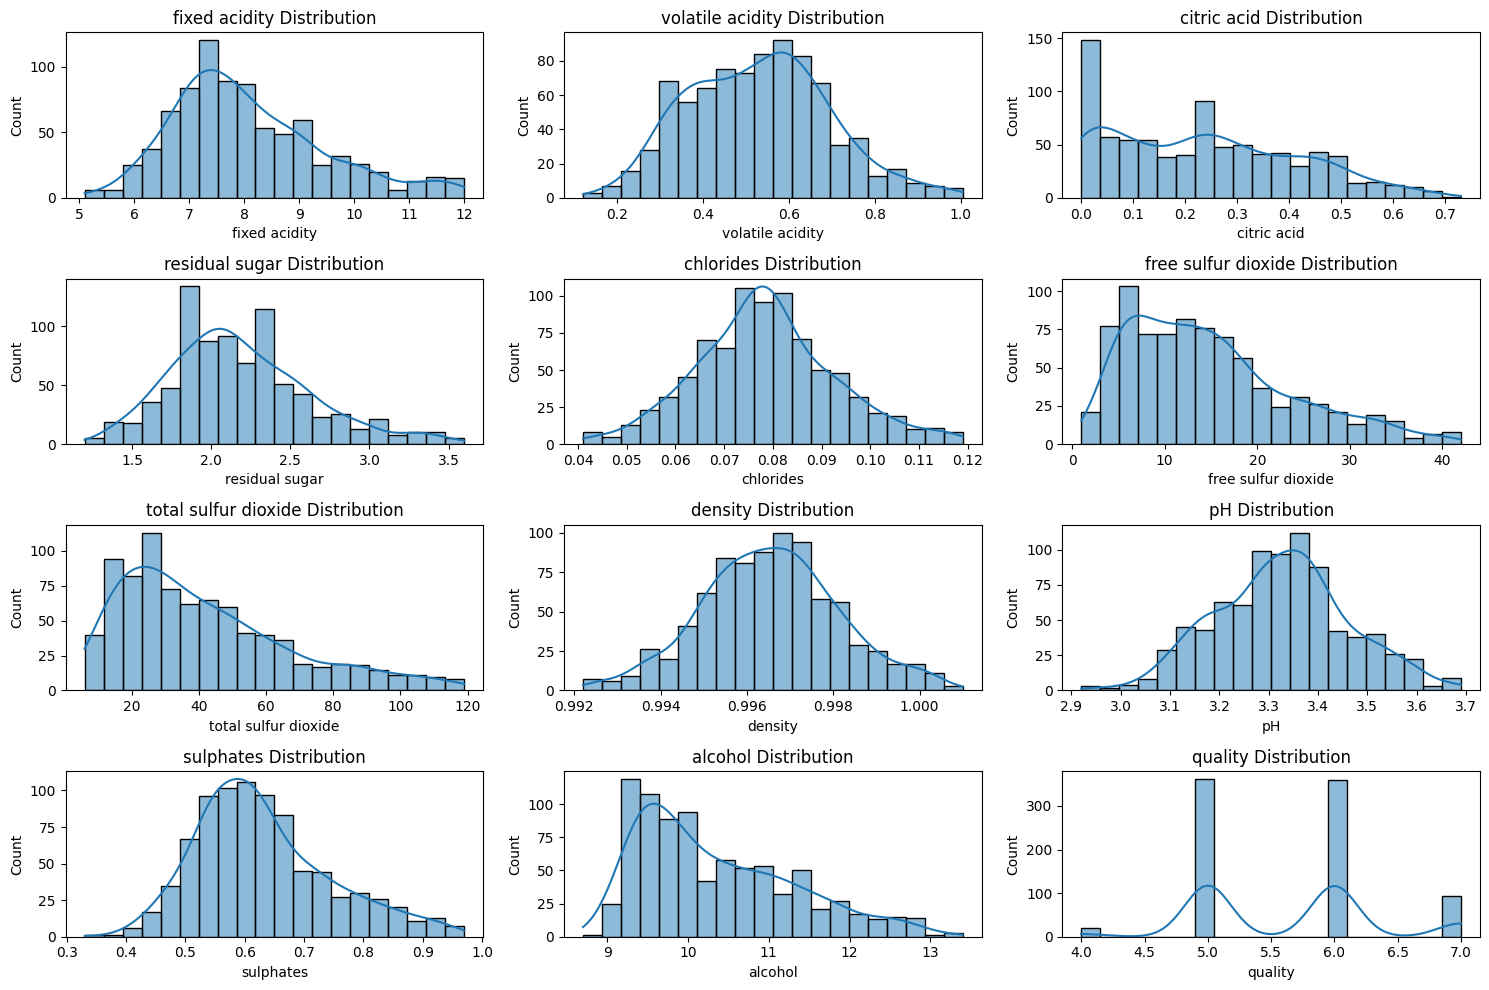

In [20]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with outliers
df_no_outliers = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

# Print the shape before and after removing outliers
print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_no_outliers.shape)
df_no_outliers.to_csv('cleaned_wine_data.csv', index=False)
# List of columns to plot
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
           'pH', 'sulphates', 'alcohol', 'quality']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through each column to create a subplot
for i, column in enumerate(columns, 1):
    plt.subplot(4, 3, i)  # 4 rows, 3 columns for 12 subplots
    sns.histplot(df_no_outliers[column], kde=True, bins=20)
    plt.title(f'{column} Distribution')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [40]:
clean_df= pd.read_csv("cleaned_wine_data.csv")
key_point_clean = ["fixed acidity",'volatile acidity','citric acid','residual sugar'
            ,'chlorides','free sulfur dioxide','total sulfur dioxide','density'
            ,'pH','sulphates','alcohol']
clean_df_kp = clean_df[key_point_clean].dropna()

print("Shape before dropping:", clean_df_kp.shape)
print("Shape after dropping:", clean_df_kp.shape)
print(clean_df_kp.columns)
Y = clean_df[key_point_clean]
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(Y)
print(Y_scaled)


Shape before dropping: (834, 11)
Shape after dropping: (834, 11)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
[[-0.48875392  1.03593488 -1.32811893 ...  1.34995603 -0.61768532
  -0.98261879]
 [-0.20260385  2.13238177 -1.32811893 ... -0.94681702  0.43489338
  -0.56911072]
 [-0.20260385  1.40141718 -1.10376179 ... -0.5022803   0.1717487
  -0.56911072]
 ...
 [-1.34720411  0.42679772 -0.87940465 ...  0.90541931 -0.44225554
   0.15452839]
 [-1.56181666  0.12222914 -0.76722608 ...  1.42404548  1.13661251
   0.87816751]
 [-1.56181666  0.70090944 -0.65504752 ...  1.79449275  0.69803805
  -0.15560266]]


In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=100)
clean_df['cluster'] = kmeans.fit_predict(Y_scaled)  
print(clean_df)

     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              7.4             0.700         0.00             1.9      0.076   
1              7.8             0.880         0.00             2.6      0.098   
2              7.8             0.760         0.04             2.3      0.092   
3             11.2             0.280         0.56             1.9      0.075   
4              7.4             0.700         0.00             1.9      0.076   
..             ...               ...          ...             ...        ...   
829            6.3             0.510         0.13             2.3      0.076   
830            6.8             0.620         0.08             1.9      0.068   
831            6.2             0.600         0.08             2.0      0.090   
832            5.9             0.550         0.10             2.2      0.062   
833            5.9             0.645         0.12             2.0      0.075   

     free sulfur dioxide  total sulfur 

In [42]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(Y_scaled)


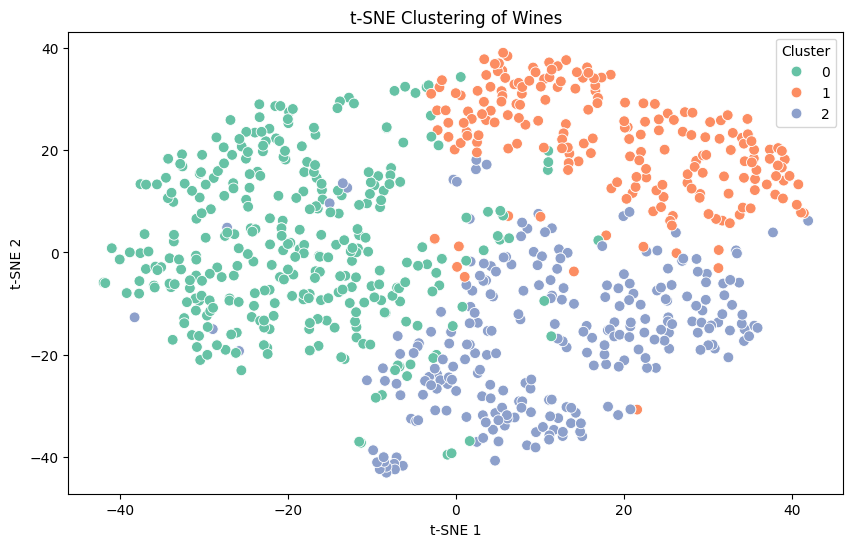

In [48]:
# Create a DataFrame for plotting
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['cluster'] = clean_df['cluster']

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='cluster', palette='Set2', s=60)
plt.title('t-SNE Clustering of Wines')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster')
plt.show()


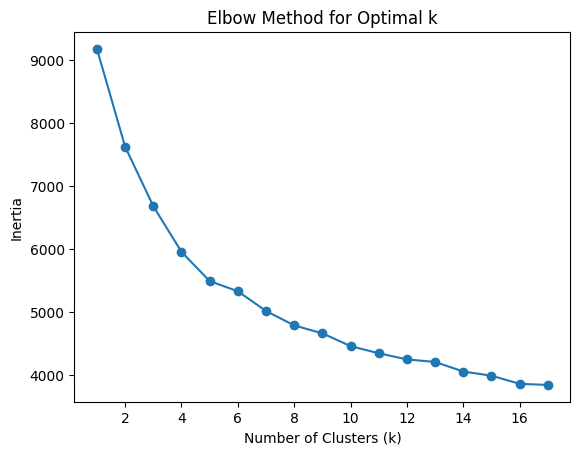

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
for k in range(1, 18):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Y_scaled)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 18), distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


k = 2, silhouette score = 0.1651
k = 3, silhouette score = 0.1684
k = 4, silhouette score = 0.1637
k = 5, silhouette score = 0.1598
k = 6, silhouette score = 0.1472
k = 7, silhouette score = 0.1442
k = 8, silhouette score = 0.1338
k = 9, silhouette score = 0.1259
k = 10, silhouette score = 0.1325


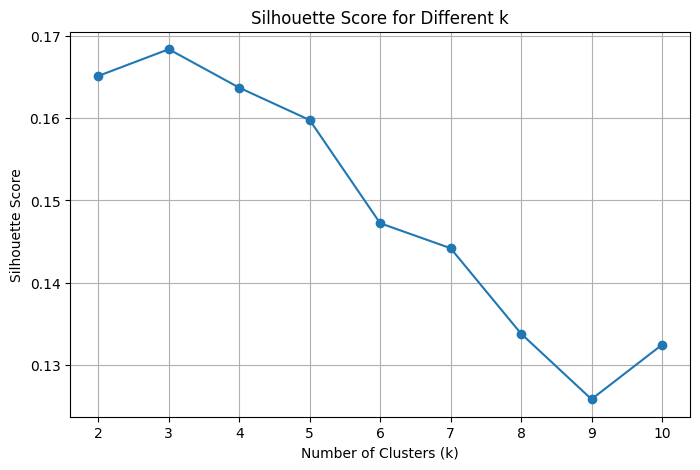

In [45]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

scores = []
K_range = range(2, 11)  # Start from 2 (silhouette is undefined for k=1)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(Y_scaled)
    score = silhouette_score(Y_scaled, labels)
    scores.append(score)
    print(f'k = {k}, silhouette score = {score:.4f}')

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.grid(True)
plt.show()


In [46]:
# First, ensure that 'cluster' is added to the DataFrame
# Assuming clean_df already contains the cluster assignments from KMeans

# Step 1: Group by 'cluster' and sort within each cluster, then select the top 10 'Id's
top_10_ids_per_cluster = {}

for cluster in range(k):  # Loop through each cluster (0, 1, 2, ..., k-1)
    # Filter the data for each cluster
    cluster_data = clean_df[clean_df['cluster'] == cluster]
    
    # Sort the cluster data by a chosen column (e.g., 'quality', 'alcohol', etc.)
    # You can replace 'quality' with another column that is more appropriate
    cluster_data_sorted = cluster_data.sort_values(by='quality', ascending=False)
    
    # Select the top 10 rows and get their 'Id'
    top_10_ids_per_cluster[cluster] = cluster_data_sorted.head(5)['Id'].values

# Print the top 10 IDs for each cluster
# Assuming `clean_df` has the cluster info and 'Id' and 'quality' columns
import pandas as pd

# List of features to include
features = [
    'quality','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]

# Prepare a list to collect rows
rows = []

# Loop through each cluster and top 10 IDs
for cluster, ids in top_10_ids_per_cluster.items():
    for wine_id in ids:
        wine_row = clean_df[clean_df['Id'] == wine_id].iloc[0]
        row_data = {
            'Id': wine_id,
            'cluster': cluster
        }
        for feature in features:
            row_data[feature] = wine_row[feature]
        rows.append(row_data)

# Create DataFrame
top_wines_df = pd.DataFrame(rows)

# Dictionary to hold separate DataFrames per cluster
cluster_tables = {}

# Loop over each unique cluster in the top_wines_df
for cluster_id in top_wines_df['cluster'].unique():
    cluster_df = top_wines_df[top_wines_df['cluster'] == cluster_id].reset_index(drop=True)
    cluster_tables[cluster_id] = cluster_df
    print(f"\n--- Cluster {cluster_id} ---")
    print(cluster_df)







--- Cluster 0 ---
     Id  cluster  quality  fixed acidity  volatile acidity  citric acid  \
0     8        0      7.0            7.8              0.58         0.02   
1  1494        0      7.0            6.4              0.31         0.09   
2     7        0      7.0            7.3              0.65         0.00   
3   128        0      7.0            8.0              0.59         0.16   
4   230        0      7.0            5.2              0.48         0.04   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0             2.0      0.073                  9.0                  18.0   
1             1.4      0.066                 15.0                  28.0   
2             1.2      0.065                 15.0                  21.0   
3             1.8      0.065                  3.0                  16.0   
4             1.6      0.054                 19.0                 106.0   

   density    pH  sulphates  alcohol  
0  0.99680  3.36       0.57      9.5  
1

In [47]:

avg_quality_per_cluster = clean_df.groupby('cluster')['quality'].mean()
print(avg_quality_per_cluster)

amount_per_cluster= clean_df.groupby('cluster').size()
print(amount_per_cluster)

mean_per_cluster = clean_df.groupby('cluster').median()
print(mean_per_cluster)


cluster
0    5.571848
1    6.083333
2    5.357401
Name: quality, dtype: float64
cluster
0    341
1    216
2    277
dtype: int64
         fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster                                                                 
0                  7.0              0.59         0.07             2.0   
1                  9.3              0.35         0.44             2.2   
2                  8.2              0.58         0.24             2.3   

         chlorides  free sulfur dioxide  total sulfur dioxide  density     pH  \
cluster                                                                         
0            0.074                 12.0                  29.0  0.99573  3.390   
1            0.074                 10.0                  24.0  0.99673  3.235   
2            0.084                 18.0                  64.0  0.99728  3.300   

         sulphates  alcohol  quality      Id  
cluster                                       
0     

In [49]:
import pandas as pd

# Ensure clean_df includes the 'cluster' and 'Id' columns, and other necessary features
# Set the number of top wines per cluster
top_n = 10  # You can adjust this number as needed

# Step 1: Create dictionary to hold top wine IDs per cluster
top_ids_per_cluster = {}

for cluster in range(k):  # Assuming 'k' is the number of clusters
    # Filter and sort data within the cluster
    cluster_data = clean_df[clean_df['cluster'] == cluster]
    cluster_sorted = cluster_data.sort_values(by='quality', ascending=False)

    # Select top N wine IDs
    top_ids_per_cluster[cluster] = cluster_sorted.head(top_n)['Id'].values

# Step 2: Define features to extract for each top wine
features = [
    'quality', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]

# Step 3: Build a DataFrame of top wines across all clusters
top_rows = []

for cluster, ids in top_ids_per_cluster.items():
    for wine_id in ids:
        wine = clean_df[clean_df['Id'] == wine_id].iloc[0]
        wine_info = {'Id': wine_id, 'cluster': cluster}
        for feature in features:
            wine_info[feature] = wine[feature]
        top_rows.append(wine_info)

top_wines_df = pd.DataFrame(top_rows)

# Step 4: Print a long output for each cluster with full feature data
for cluster_id in sorted(top_wines_df['cluster'].unique()):
    cluster_df = top_wines_df[top_wines_df['cluster'] == cluster_id].reset_index(drop=True)
    print(f"\n{'='*40}\nTop Wines in Cluster {cluster_id}\n{'='*40}")
    print(cluster_df.to_string(index=False))  # to_string disables truncation



Top Wines in Cluster 0
  Id  cluster  quality  fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  alcohol
   8        0      7.0            7.8             0.580         0.02             2.0      0.073                  9.0                  18.0  0.99680 3.36       0.57      9.5
1494        0      7.0            6.4             0.310         0.09             1.4      0.066                 15.0                  28.0  0.99459 3.42       0.70     10.0
   7        0      7.0            7.3             0.650         0.00             1.2      0.065                 15.0                  21.0  0.99460 3.39       0.47     10.0
 128        0      7.0            8.0             0.590         0.16             1.8      0.065                  3.0                  16.0  0.99620 3.42       0.92     10.5
 230        0      7.0            5.2             0.480         0.04             1.6      0.054                

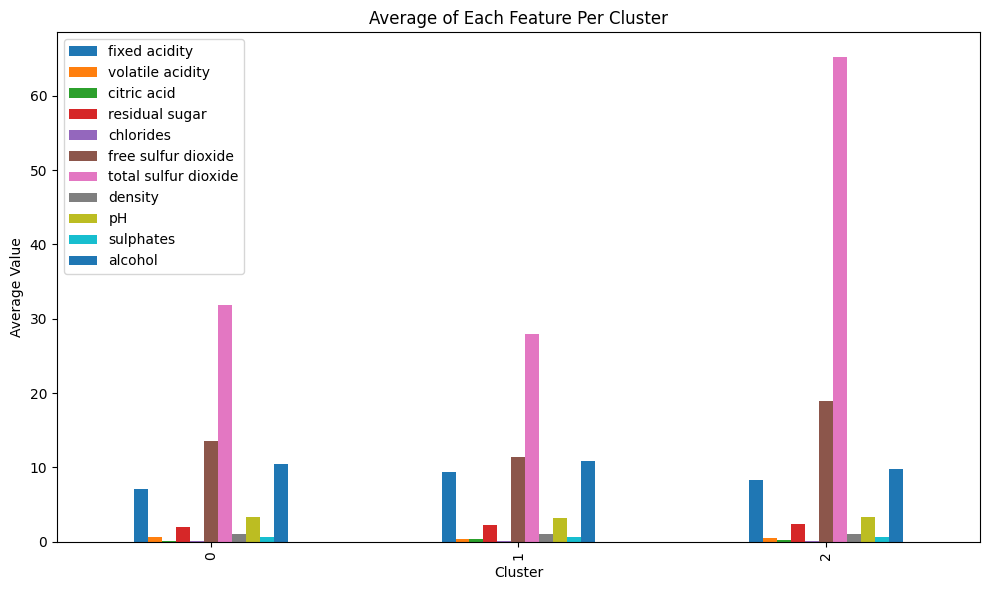

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming clean_df is your DataFrame and 'cluster' column is already present
# List of the features to analyze
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']

# Calculate the average of each feature per cluster
avg_per_cluster = clean_df.groupby('cluster')[features].mean()

# Plotting the bar graph for each feature
avg_per_cluster.plot(kind='bar', figsize=(10, 6))

# Adding title and labels
plt.title('Average of Each Feature Per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')

# Display the plot
plt.tight_layout()
plt.show()
